In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

cacao = pd.read_csv('cacao_flavors.csv')
cacao.head()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [3]:
display(cacao.head(10))
cacao.info() 

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,7,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,8,A. Morin,Sur del Lago,1315,2014,70%,France,11.50,Criollo,Venezuela
8,9,,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,10,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [4]:
cacao.select_dtypes(include=['number'])

,Bar id,REF,Review\nDate,Rating
0,1,1876,2016,11.50
1,2,1676,2015,2.75
2,3,1676,2015,3.00
3,4,1680,2015,3.50
4,5,1704,2015,3.50
...,...,...,...,...
1790,1791,647,2011,3.75
1791,1792,749,2011,3.00
1792,1793,749,2011,3.50
1793,1794,781,2011,3.25


In [5]:
cacao.select_dtypes(include=['object'])

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,Cocoa\nPercent,Company\nLocation,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,63%,France,,Sao Tome
1,A. Morin,Kpime,70%,France,,Togo
2,A. Morin,Atsane,670%,France,,Togo
3,A. Morin,Akata,70%,France,,Togo
4,A. Morin,Quilla,70%,France,,Peru
...,...,...,...,...,...,...
1790,Zotter,Peru,70%,Austria,,Peru
1791,Zotter,Congo,65%,Austria,Forastero,Congo
1792,Zotter,Kerala State,65%,Austria,Forastero,India
1793,Zotter,Kerala State,62%,Austria,,India


In [6]:
cc = cacao

In [7]:
cc.head()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [8]:
cc.columns

Index(['Bar id', 'Company \n(Maker-if known)',
       'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate',
       'Cocoa\nPercent', 'Company\nLocation', 'Rating', 'Bean\nType',
       'Broad Bean\nOrigin'],
      dtype='object')

In [9]:
cc.columns = ['bar_id', 'company', 'specific_origin', 'ref', 'review_date', 'cocoa_percent', 'company_location', 'rating', 'bean_type', 'board_origin']
cc.head()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,board_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


1795


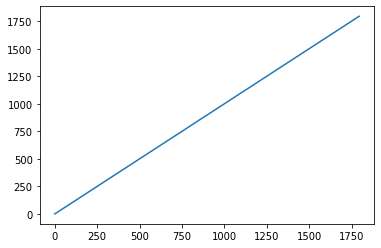

In [10]:
print(cc.bar_id.nunique())
plt.plot(cc.bar_id)

In [11]:
cc.drop(['bar_id'], inplace = True, axis = 1)
cc.head()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,board_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [12]:
pd.DataFrame(cc.company.value_counts())

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Raoul Boulanger,1
Glennmade,1
Mayacama,1
Chocolate Conspiracy,1


In [13]:
cc.company.unique()

array(['A. Morin', '\xa0', 'Acalli', 'Adi', 'Aequare (Gianduja)',
       'Ah Cacao', "Akesson's (Pralus)", 'Alain Ducasse', 'Alexandre',
       'Altus aka Cao Artisan', 'Amano', 'Amatller (Simon Coll)',
       'Amazona', 'Ambrosia', 'Amedei', 'AMMA', 'Anahata', 'Animas',
       'Ara', 'Arete', 'Artisan du Chocolat',
       'Artisan du Chocolat (Casa Luker)', 'Askinosie', 'Bahen & Co.',
       'Bakau', 'Bar Au Chocolat', "Baravelli's", 'Batch', 'Beau Cacao',
       'Beehive', 'Belcolade', 'Bellflower', 'Belyzium', 'Benoit Nihant',
       'Bernachon', 'Beschle (Felchlin)', 'Bisou', 'Bittersweet Origins',
       'Black Mountain', 'Black River (A. Morin)', 'Blanxart',
       'Blue Bandana', 'Bonnat', 'Bouga Cacao (Tulicorp)', 'Bowler Man',
       "Brasstown aka It's Chocolate", 'Brazen', 'Breeze Mill', 'Bright',
       'Britarev', 'Bronx Grrl Chocolate', 'Burnt Fork Bend',
       'Cacao Arabuco', 'Cacao Atlanta', 'Cacao Barry', 'Cacao de Origen',
       'Cacao de Origin', 'Cacao Hunters', 

In [14]:
len(set(filter(lambda x: len(x) > 1, cc.company)))

407

In [15]:
cc.company = cc.company.apply(lambda x: None if x == '' else x)
cc.company.nunique()

408

In [16]:
display(pd.DataFrame(cc.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:" #Число 10 взято для ориентира, можно брать другое
      , (cc.company.value_counts()>10).sum())
cc.loc[:, ['company']].info()

,company
,99
Soma,45
Bonnat,26
Fresco,26
Pralus,25
...,...
Raoul Boulanger,1
Glennmade,1
Mayacama,1
Chocolate Conspiracy,1


Значений, встретившихся в столбце более 10 раз: 31
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1795 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


In [17]:
cc.specific_origin.value_counts()

                             58
Madagascar                   55
Peru                         44
Ecuador                      39
Dominican Republic           33
                             ..
Dark 75                       1
Maralumi P.                   1
Manhattan                     1
Vila Gracinda                 1
Cumboto, farmer Jose Lugo     1
Name: specific_origin, Length: 1013, dtype: int64

In [18]:
cc.specific_origin.nunique()

1013

In [19]:
cc.specific_origin = cc.specific_origin.apply(lambda x: None if x.strip() == '' else x)
cc.specific_origin.nunique()

1012

In [20]:
print("Значений, встретившихся в столбце более 10 раз:" #Число 10 взято для ориентира, можно брать другое
      , (cc.specific_origin.value_counts()>10).sum())
cc.loc[:, ['specific_origin']].info()

Значений, встретившихся в столбце более 10 раз: 15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   specific_origin  1737 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

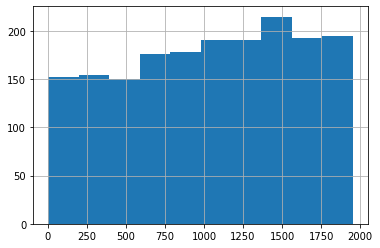

In [21]:
cc.ref.hist()
cc.ref.describe()

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

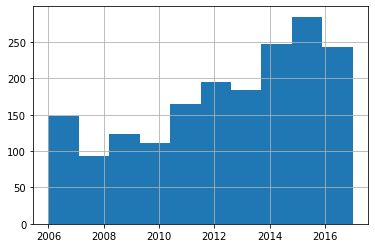

In [22]:
cc.review_date.hist()
cc.review_date.describe()

In [23]:
cc.cocoa_percent

0        63%
1        70%
2       670%
3        70%
4        70%
        ... 
1790     70%
1791     65%
1792     65%
1793     62%
1794     65%
Name: cocoa_percent, Length: 1795, dtype: object

In [24]:
cc.cocoa_percent = cc.cocoa_percent.apply(lambda x: float(x.replace('%', '')))
cc.head()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,board_origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670.0,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru


count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

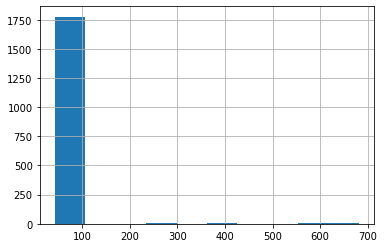

In [25]:
cc.cocoa_percent.hist()
cc.cocoa_percent.describe()

25-й перцентиль: 70.0, 75-й перцентиль: 75.0, IQR: 5.0,  Границы выбросов: [62.5, 82.5].


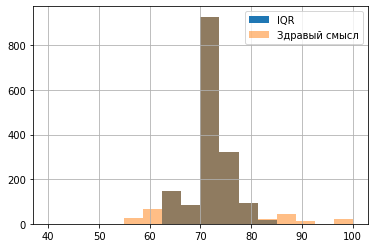

In [26]:
IQR = cc.cocoa_percent.quantile(0.75) - cc.cocoa_percent.quantile(0.25)
perc25 = cc.cocoa_percent.quantile(0.25)
perc75 = cc.cocoa_percent.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cc.cocoa_percent.loc[cc.cocoa_percent.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (40, 100), label = 'IQR')
 
cc.cocoa_percent.loc[cc.cocoa_percent <= 100].hist(
alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
 
plt.legend();

In [27]:
cc = cc.loc[cc.cocoa_percent <= 100]
cc.cocoa_percent

0       63.0
1       70.0
3       70.0
4       70.0
5       70.0
        ... 
1790    70.0
1791    65.0
1792    65.0
1793    62.0
1794    65.0
Name: cocoa_percent, Length: 1776, dtype: float64

In [28]:
cc.company_location

0        France
1        France
3        France
4        France
5        France
         ...   
1790    Austria
1791    Austria
1792    Austria
1793    Austria
1794    Austria
Name: company_location, Length: 1776, dtype: object

In [29]:
display(pd.DataFrame(cc.company_location.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cc.company_location.value_counts()>10).sum())
cc.loc[:, ['company_location']].info()

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Russia,1
Wales,1
Czech Republic,1
Ghana,1


Значений, встретившихся в столбце более 10 раз: 22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_location  1776 non-null   object
dtypes: object(1)
memory usage: 27.8+ KB


In [30]:
cc.rating

0       11.50
1        2.75
3        3.50
4        3.50
5        2.75
        ...  
1790     3.75
1791     3.00
1792     3.50
1793     3.25
1794     3.00
Name: rating, Length: 1776, dtype: float64

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

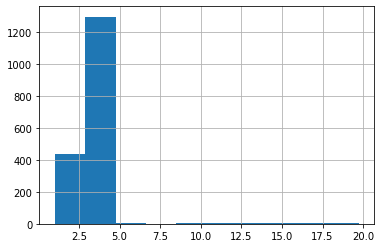

In [31]:
cc.rating.hist()
cc.rating.describe()

25-й перцентиль: 3.0, 75-й перцентиль: 3.5, IQR: 0.5,  Границы выбросов: [2.25, 4.25].


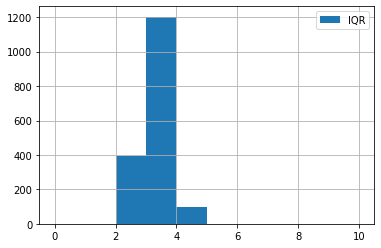

In [32]:
IQR = cc.rating.quantile(0.75) - cc.rating.quantile(0.25)
perc25 = cc.rating.quantile(0.25)
perc75 = cc.rating.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
cc.rating.loc[cc.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend()

In [33]:
cc = cc.loc[cc.rating.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
cc

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,board_origin
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,,Cuba
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70.0,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65.0,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65.0,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62.0,Austria,3.25,,India


In [34]:
cacao.bean_type = cacao.bean_type.astype(str).apply(lambda x: None if x.strip() == '' else x)
cacao.bean_type.unique()

array([None, 'Criollo', 'Trinitario', 'Forastero (Arriba)', 'Forastero',
       'Forastero (Nacional)', 'Criollo, Trinitario',
       'Criollo (Porcelana)', 'Blend', 'Trinitario (85% Criollo)',
       'Forastero (Catongo)', 'Forastero (Parazinho)',
       'Trinitario, Criollo', 'CCN51', 'Criollo (Ocumare)', 'Nacional',
       'Criollo (Ocumare 61)', 'Criollo (Ocumare 77)',
       'Criollo (Ocumare 67)', 'Criollo (Wild)', 'Beniano', 'Amazon mix',
       'Trinitario, Forastero', 'Forastero (Arriba) ASS', 'Criollo, +',
       'Amazon', 'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Trinitario (Scavina)', 'Criollo, Forastero', 'Matina',
       'Forastero(Arriba, CCN)', 'Nacional (Arriba)',
       'Forastero (Arriba) ASSS', 'Forastero, Trinitario',
       'Forastero (Amelonado)', 'nan', 'Trinitario, Nacional',
       'Trinitario (Amelonado)', 'Trinitario, TCGA', 'Criollo (Amarru)'],
      dtype=object)

In [35]:
display(pd.DataFrame(cc.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cc.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cc.bean_type.nunique())
cc.loc[:, ['bean_type']].info()

,bean_type
,829
Trinitario,401
Criollo,147
Forastero,81
Forastero (Nacional),50
"Criollo, Trinitario",37
Blend,36
Forastero (Arriba),30
Criollo (Porcelana),10
"Trinitario, Criollo",9


Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 41
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [36]:
cc.bean_type = cacao.bean_type.apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                      else x if '(' not in x else x[:x.find('(')].strip())
cc.bean_type.unique()

array([None, 'Criollo', 'Trinitario', 'Forastero', 'Criollo, Trinitario',
       'Blend', 'Trinitario, Criollo', 'CCN51', 'Nacional', 'Beniano',
       'Amazon mix', 'Trinitario, Forastero', 'Criollo, +', 'Amazon',
       'Amazon, ICS', 'EET', 'Blend-Forastero,Criollo',
       'Criollo, Forastero', 'Matina', 'Forastero, Trinitario',
       'Trinitario, Nacional', 'Trinitario, TCGA'], dtype=object)

In [37]:
display(pd.DataFrame(cc.bean_type.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:", (cc.bean_type.value_counts()>10).sum())
print("Уникальных значений:", cc.bean_type.nunique())
cc.loc[:, ['bean_type']].info()

,bean_type
Trinitario,405
Forastero,179
Criollo,165
"Criollo, Trinitario",37
Blend,36
"Trinitario, Criollo",9
Nacional,5
EET,3
Matina,3
Beniano,3


Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [38]:
cc.board_origin

1            Togo
3            Togo
4            Peru
5       Venezuela
6            Cuba
          ...    
1790         Peru
1791        Congo
1792        India
1793        India
1794       Brazil
Name: board_origin, Length: 1690, dtype: object

In [39]:
cc.board_origin = cacao.board_origin.apply(lambda x: None if x == '' else x)
cc.board_origin.value_counts()

Venezuela                       202
Ecuador                         179
Peru                            159
Madagascar                      138
Dominican Republic              135
                               ... 
Guat., D.R., Peru, Mad., PNG      1
Peru, Ecuador                     1
Peru, Ecuador, Venezuela          1
Gabon                             1
Ven, Bolivia, D.R.                1
Name: board_origin, Length: 97, dtype: int64

In [40]:
(cc.board_origin.value_counts()>10).sum()

26

In [41]:
cc.board_origin.nunique()

97

In [42]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [43]:
cc.board_origin = cc.board_origin.apply(fix_countries).sort_values()
cc.board_origin

1            Togo
3            Togo
4            Peru
5       Venezuela
6            Cuba
          ...    
1790         Peru
1791        Congo
1792        India
1793        India
1794       Brazil
Name: board_origin, Length: 1690, dtype: object

In [44]:
display(pd.DataFrame(cc.board_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (cc.board_origin.value_counts()>10).sum())
print("Уникальных значений:", cc.board_origin.nunique())
cc.loc[:, ['board_origin']].info()

,board_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"Peru,Madagascar",1
Gabon,1
"Venezuela,Java",1
"Peru,Ecuador,Venezuela",1


Значений, упомянутых более 10 раз: 26
Уникальных значений: 94
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   board_origin  1689 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


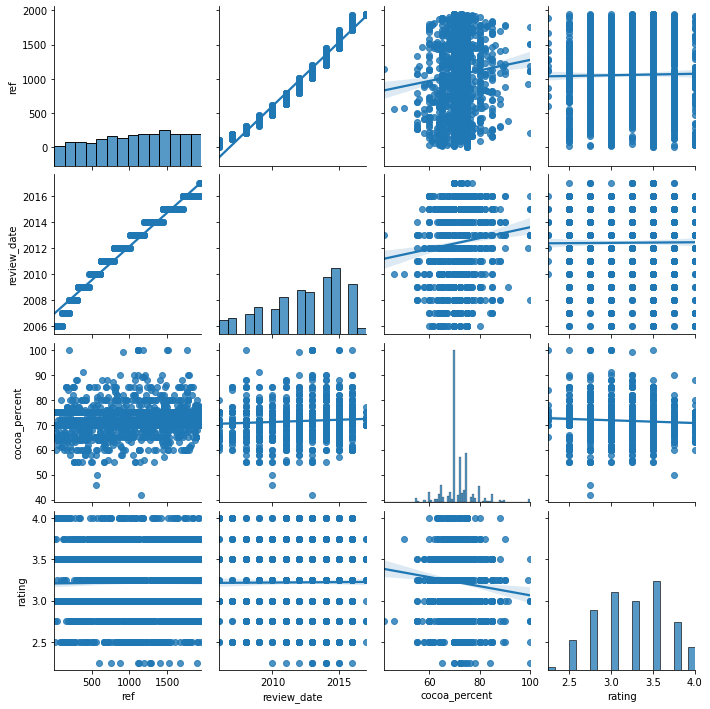

In [45]:
sns.pairplot(cc, kind = 'reg')

In [46]:
cc.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


In [47]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='rating', 
                data=cc.loc[cc.loc[:, column].isin(cc.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

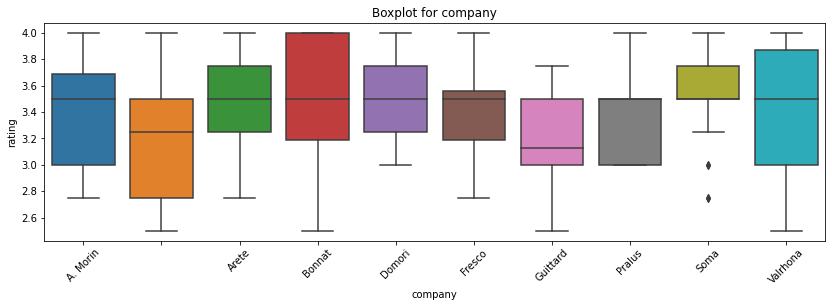

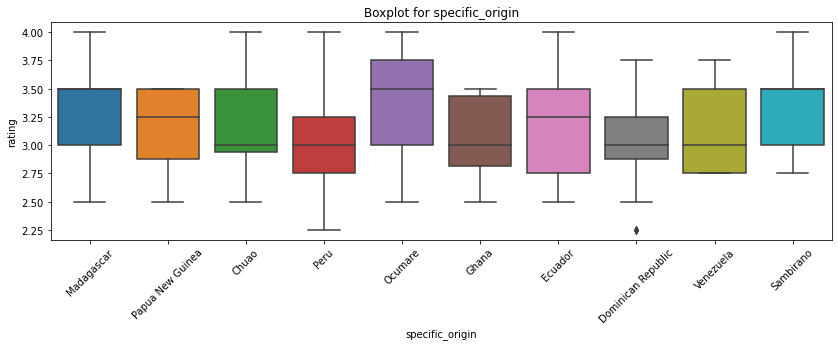

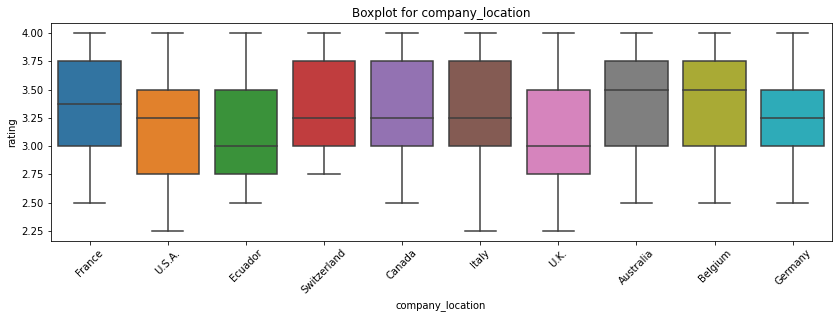

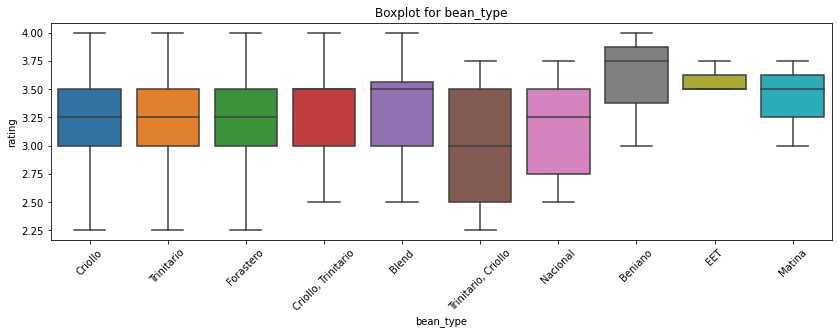

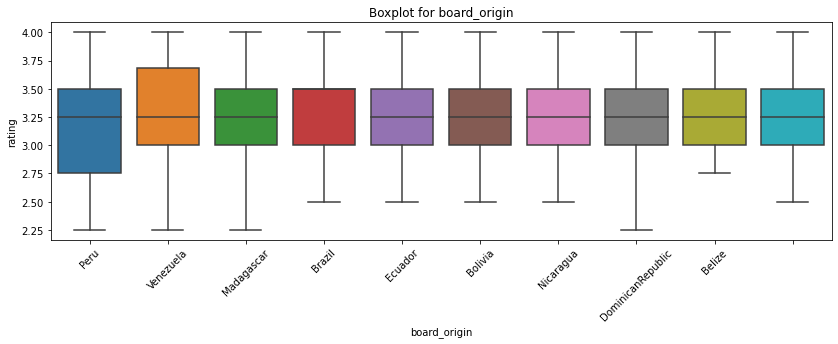

In [48]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'board_origin']:
    get_boxplot(col)

In [49]:
def get_stat_dif(column):
    cols = cc.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(cc.loc[cc.loc[:, column] == comb[0], 'rating'], 
                        cc.loc[cc.loc[:, column] == comb[1], 'rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [50]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'board_origin']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


In [52]:
cacao_for_model = cc.loc[:, ['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
cacao_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


In [57]:
arr = [0.05, 0.1, 0.3, 0.25, 0.15, 0.07, 0.05, 0.03]
E_X = 0
for i in range(8):
    E_X += (i+1)*arr[i]
E_X

3.91

In [60]:
arr = [0.05, 0.1, 0.3, 0.25, 0.15, 0.07, 0.05, 0.03]
E_X = 0
VarX = 0
for i in range(8):
    E_X += (i+1)*arr[i]
for i in range(8):
    VarX += (i+1-E_X)**2*arr[i]
VarX

2.5019

In [63]:
arr = [0.1, 0.2, 0.6, 0.1]
E_X = 0
VarX = 0
for i in range(len(arr)):
    E_X += (i+2)*arr[i]
for i in range(len(arr)):
    VarX += (i+2-E_X)**2*arr[i]
E_X, VarX

(3.7, 0.61)

In [65]:
import math 
math.sqrt(VarX)

0.7810249675906654

In [69]:
arr = [0.1, 0.1, 0.3, 0.2, 0.2, 0.1]
start_X = 38
E_X = 0
VarX = 0
for i in range(len(arr)):
    E_X += (i+start_X)*arr[i]
for i in range(len(arr)):
    VarX += (i+start_X-E_X)**2*arr[i]
E_X, VarX, math.sqrt(VarX)

(40.6, 2.04, 1.42828568570857)

In [74]:
arr = [0.1, 0.1, 0.3, 0.2, 0.2, 0.1]
start_X = 38
E_X = 0
VarX = 0
for i in range(len(arr)):
    E_X += ((i+start_X)*10+20)*arr[i]
for i in range(len(arr)):
    VarX += ((i+start_X)*10+20-E_X)**2*arr[i]
E_X, VarX, math.sqrt(VarX)

(426.0, 204.00000000000003, 14.2828568570857)

In [75]:
arrX = [0.2, 0.1, 0.4, 0.3]
arrY = [0.5, 0.2, 0.1, 0.2]
start_X = 1
E_X = 0
VarX = 0
length = len(arrX)
for i in range(length):
    E_X += (i+start_X)*arrX[i]
for i in range(length):
    VarX += (i+start_X-E_X)**2*arrX[i]
E_X, VarX, math.sqrt(VarX)

(2.8, 1.16, 1.0770329614269007)

In [76]:
arrX = [0.2, 0.1, 0.4, 0.3]
arrY = [0.5, 0.2, 0.1, 0.2]
arrX = arrY
start_X = -1
E_X = 0
VarX = 0
length = len(arrX)
for i in range(length):
    E_X += (i+start_X)*arrX[i]
for i in range(length):
    VarX += (i+start_X-E_X)**2*arrX[i]
E_X, VarX, math.sqrt(VarX)

(0.0, 1.4, 1.1832159566199232)

In [90]:
arrX = [0.2, 0.1, 0.4, 0.3]
arrY = [0.5, 0.2, 0.1, 0.2]
start_X = 1
E_X = 0
VarU = 0
length = len(arrX)
for i in range(length):
    E_X += (3*(i+start_X)+1)*arrX[i]
for i in range(length):
    VarU += (3*(i+start_X)+1-E_X)**2*arrX[i]
E_X, VarU, math.sqrt(VarU)

(9.4, 10.440000000000001, 3.2310988842807027)

In [91]:
arrX = [0.2, 0.1, 0.4, 0.3]
arrY = [0.5, 0.2, 0.1, 0.2]
arrX = arrY
start_X = -1
E_X = 0
VarS = 0
length = len(arrX)
for i in range(length):
    E_X += (5-(i+start_X))*arrX[i]
for i in range(length):
    VarS += (5-(i+start_X)-E_X)**2*arrX[i]
E_X, VarS, math.sqrt(VarS)

(5.0, 1.4, 1.1832159566199232)

In [92]:
arrX = [0.2, 0.1, 0.4, 0.3]
arrY = [0.5, 0.2, 0.1, 0.2]
start_X = 1
start_Y = -1
E_X = 0
VarX = 0
length = len(arrX)
for i in range(length):
    E_X += (3*(i+start_X)+1)*arrX[i] - (5-(i+start_Y))*arrY[i]
VarX = VarU + VarS
E_X, VarX, math.sqrt(VarX)

(4.4, 11.840000000000002, 3.440930106817051)

In [93]:
from scipy.stats import norm

In [94]:
norm.cdf(1)

0.8413447460685429

In [95]:
norm.cdf(1.12)

0.8686431189572693

In [96]:
norm.cdf(-1.87)

0.030741908929465954

In [97]:
norm.cdf(2)

0.9772498680518208

In [98]:
norm.ppf(0.1)

-1.2815515655446004

In [107]:
norm.ppf(1-0.05)

1.6448536269514722

In [100]:
norm.ppf(0.025)

-1.9599639845400545

In [108]:
norm.ppf(1-0.01)

2.3263478740408408

In [102]:
norm.ppf(0.005)

-2.575829303548901

<img src="image_1.png"/>

<img src="image.png"/>

In [109]:
1-norm.cdf(75, 70, 5**(1/2))

0.0126736593387341

<img src="image_2.png"/>

In [117]:
norm.cdf(0.16, 0.2, 225)

-223.55302372219444